# Question 2: Bias-variance tradeoff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

We will use a linear model

\begin{equation}
    y = 2x + \varepsilon,
\end{equation}

where $\varepsilon\sim\mathcal{N}(0,1)$.

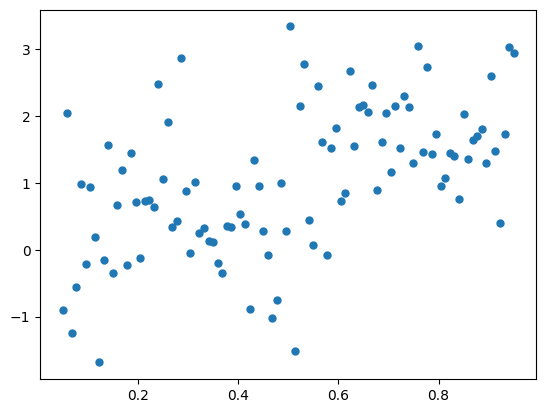

In [23]:
N_train = 100
sigma = 1

# Generate some synthetic data
x = np.linspace(0.05, 0.95, N_train)

# Realise some Gaussian noise
noise = np.random.randn(N_train) * sigma

# Generate targets according to a linear model
y = 2 * x + noise

plt.plot(x,y, "o", ms=5, label='Training')

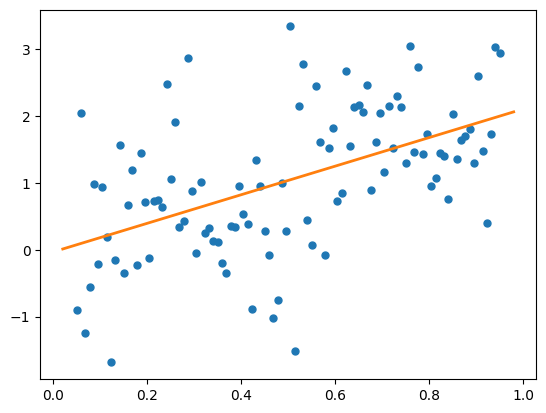

In [24]:
# Linear Regression
# Create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training sets
clf.fit(x[:, np.newaxis], y)
# The coefficients

xplot=np.linspace(0.02,0.98,200)

plt.plot(x,y, "o",ms=5, label='Training')
plt.plot(xplot, clf.predict(xplot[:, np.newaxis]),label='Linear',linewidth=2)

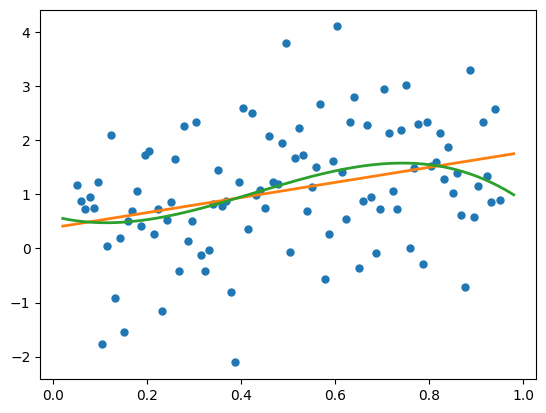

In [ ]:
N_train=100

sigma_train=1

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw random noise
s = sigma_train*np.random.randn(N_train)

# Linear
y=2*x+s


p1=plt.plot(x,y, "o",ms=5, label='Training')

# Linear Regression
# Create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training sets
clf.fit(x[:, np.newaxis], y)
# The coefficients

xplot=np.linspace(0.02,0.98,200)
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]),label='Linear',linewidth=2)

# Polynomial Regression

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3',linewidth=2)

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_31951/1520547742.py:17: SyntaxWarning: invalid escape sequence '\s'
  Title="$N=$"+str(N_train)+", $\sigma=$"+str(sigma_train)


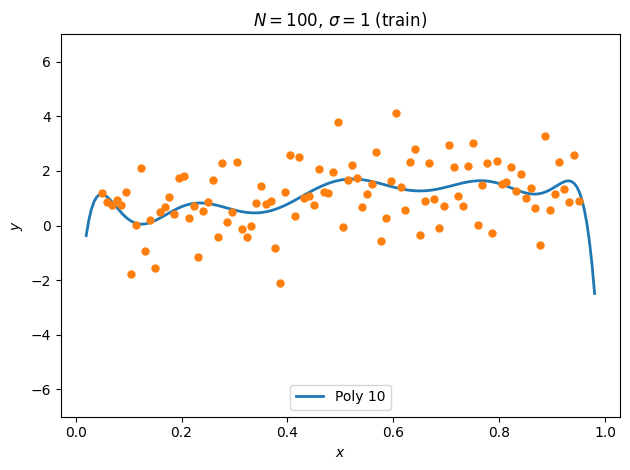

In [26]:
poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10',linewidth=2)

axes = plt.gca()
axes.set_ylim([-7,7])

handles, labels=axes.get_legend_handles_labels()
plt.legend(handles,labels, loc='lower center')
p1=plt.plot(x,y, "o",ms=5, label='Training')
plt.xlabel("$x$")
plt.ylabel("$y$")
Title="$N=$"+str(N_train)+", $\sigma=$"+str(sigma_train)
plt.title(Title+" (train)")
plt.tight_layout()
plt.show()

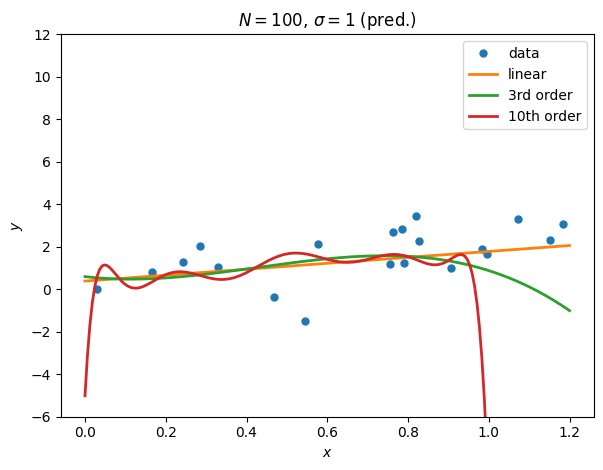

In [27]:
# Generate Test Data

# Number of test data
N_test=20

sigma_test=sigma_train

max_x=1.2
x_test=max_x*np.random.random(N_test)
# Draw random noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
# y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])


fig = plt.figure() 
p1=plt.plot(x_test,y_test.transpose(), 'o', ms=5, label='data',linewidth=2)
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), label='linear',linewidth=2)
p3=plt.plot(x_plot,clf3.predict(X3), label='3rd order',linewidth=2)
p10=plt.plot(x_plot,clf10.predict(X10), label='10th order',linewidth=2)


plt.legend(loc=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))
plt.show()

To run this experiment, we need to loop through some range of $N_\text{train}$ and generate a new training set for each value. For each training set we will train three polynomial models (linear, third, and tenth order) and evaluate their performance both on a fixed set of test data and also the training data itself. We will then investigate the behaviour of these errors as the number of training points varies.

In [13]:
# Write a function to generate synthetic test data, fit a polynomial of a given order, and evaluate its performance on a training
# and test set. Return lists of the errors for each data point for both the training and test sets.

def fit_and_evaluate(N_train, sigma_train, order, N_test, sigma_test):

    # Create test data
    x = np.linspace(0.05, 0.95, N_train)
    # Generate some Gaussian noise
    s = sigma_train * np.random.randn(N_train)
    # Data points as a linear model with Gaussian noise
    y = 2 * x + s

    # Fit a model of a given order to the training data
    poly = PolynomialFeatures(degree=order)
    X = poly.fit_transform(x[:,np.newaxis])
    clf = linear_model.LinearRegression()
    clf.fit(X,y)

    # Test the model predictions. Create some test data
    max_x=1.2
    x_test=max_x*np.random.random(N_test)
    # Draw random noise
    s_test = sigma_test*np.random.randn(N_test)

    y_test=2*x_test+s_test

    X_train_pred = poly.transform(x[:,np.newaxis])
    training_predictions = clf.predict(X_train_pred)
    training_errors = np.sqrt((y - training_predictions) ** 2)

    X_test_pred = poly.transform(x_test[:,np.newaxis])
    test_predictions = clf.predict(X_test_pred)
    test_errors = np.sqrt((y_test - test_predictions) ** 2)
    return(training_errors, test_errors)

poly3_training_errors, poly3_test_errors = fit_and_evaluate(10, 1, 3, 20, 1)
print("Poly 3 training errors:", poly3_training_errors)
print("Poly 3 test errors:", poly3_test_errors)

Poly 3 training errors: [0.31554812 0.72827215 0.20591072 0.42866053 0.209773   1.22792642
 1.31108837 0.38558174 0.32635506 0.19715462]
Poly 3 test errors: [0.07459294 0.907437   0.81866546 1.04939282 0.57887477 0.10521624
 0.21517905 0.53590565 0.89362445 1.96963864 0.09703221 0.11111436
 0.83598808 0.51878098 1.4299749  1.22097118 0.21198472 0.72286376
 1.82486444 0.74265999]
